In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.7.0'

# Preprocessing

In [3]:
dataset = pd.read_csv('StudentsPerformance.csv')

dataset.columns=['gender','groups_rac','edu','lunch','mathScore','readingScore','writingScore','result']
#dataset.head()

dataset = pd.concat([dataset,pd.get_dummies(dataset['gender'],prefix='gender',drop_first=True)],axis=1);
dataset.drop(['gender'],axis=1,inplace=True)

dataset


,groups_rac,edu,lunch,mathScore,readingScore,writingScore,result,gender_male
0,group B,bachelor's degree,standard,72,72,74,none,0
1,group C,some college,standard,69,90,88,completed,0
2,group B,master's degree,standard,90,95,93,none,0
3,group A,associate's degree,free/reduced,47,57,44,none,1
4,group C,some college,standard,76,78,75,none,1
...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,88,99,95,completed,0
996,group C,high school,free/reduced,62,55,55,none,1
997,group C,high school,free/reduced,59,71,65,completed,0
998,group D,some college,standard,68,78,77,completed,0


In [4]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['groups_rac'],prefix='groups_rac',drop_first=True)],axis=1);
dataset.drop(['groups_rac'],axis=1,inplace=True)

dataset = pd.concat([dataset,pd.get_dummies(dataset['edu'],prefix='edu',drop_first=True)],axis=1);
dataset.drop(['edu'],axis=1,inplace=True)

dataset.head()

,lunch,mathScore,readingScore,writingScore,result,gender_male,groups_rac_group B,groups_rac_group C,groups_rac_group D,groups_rac_group E,edu_bachelor's degree,edu_high school,edu_master's degree,edu_some college,edu_some high school
0,standard,72,72,74,none,0,1,0,0,0,1,0,0,0,0
1,standard,69,90,88,completed,0,0,1,0,0,0,0,0,1,0
2,standard,90,95,93,none,0,1,0,0,0,0,0,1,0,0
3,free/reduced,47,57,44,none,1,0,0,0,0,0,0,0,0,0
4,standard,76,78,75,none,1,0,1,0,0,0,0,0,1,0


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset['lunch'] = le.fit_transform(dataset['lunch']) 

map_dic = {"none":0,"completed":1}
dataset['result'] = dataset['result'].map(map_dic)

dataset = dataset[["gender_male","groups_rac_group B","groups_rac_group C","groups_rac_group D","groups_rac_group E",
                   "edu_some high school","edu_bachelor's degree","edu_high school","edu_master's degree","edu_some college",
                   "lunch","mathScore","readingScore","writingScore","result"]]

dataset.tail()

,gender_male,groups_rac_group B,groups_rac_group C,groups_rac_group D,groups_rac_group E,edu_some high school,edu_bachelor's degree,edu_high school,edu_master's degree,edu_some college,lunch,mathScore,readingScore,writingScore,result
995,0,0,0,0,1,0,0,0,1,0,1,88,99,95,1
996,1,0,1,0,0,0,0,1,0,0,0,62,55,55,0
997,0,0,1,0,0,0,0,1,0,0,0,59,71,65,1
998,0,0,0,1,0,0,0,0,0,1,1,68,78,77,1
999,0,0,0,1,0,0,0,0,0,1,0,77,86,86,0


In [6]:
X = dataset.iloc[:, :-1].values
y = dataset['result'].values
print(X[0])


[ 0  1  0  0  0  0  1  0  0  0  1 72 72 74]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )

In [8]:
print(X_test)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#print(X_test)

[[  0   0   1 ...  40  58  54]
 [  0   0   0 ...  93 100  95]
 [  0   0   0 ...  77  77  73]
 ...
 [  0   1   0 ...  57  69  68]
 [  1   0   0 ...  55  59  59]
 [  0   1   0 ...  58  76  78]]


# ANN

In [9]:
ann = tf.keras.models.Sequential()

In [10]:
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

In [11]:
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

In [12]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [13]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
history = ann.fit(X_train, y_train,batch_size=32, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6389 - accuracy: 0.6425
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.6825
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.6900
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5680 - accuracy: 0.7000
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5585 - accuracy: 0.7212
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5480 - accuracy: 0.7188
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5395 - accuracy: 0.7275
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5275 - accuracy: 0.7400
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.7412
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5120 - accuracy: 0.7387
Epoch 11/

In [15]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]

# confusion_matrix && accuracy_score

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[92 26]
 [30 52]]


0.72

# ROC Model

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [18]:
y_pred = ann.predict(X_test).ravel()
print(X_test)

[[-9.82650480e-01 -4.68521286e-01  1.41686936e+00 ... -1.74532045e+00
  -7.69895248e-01 -9.23628385e-01]
 [-9.82650480e-01 -4.68521286e-01 -7.05781369e-01 ...  1.76619076e+00
   2.11463646e+00  1.77622110e+00]
 [-9.82650480e-01 -4.68521286e-01 -7.05781369e-01 ...  7.06111900e-01
   5.35011952e-01  3.27521375e-01]
 ...
 [-9.82650480e-01  2.13437475e+00 -7.05781369e-01 ... -6.18986669e-01
  -1.44226585e-02 -1.72856217e-03]
 [ 1.01765584e+00 -4.68521286e-01 -7.05781369e-01 ... -7.51496526e-01
  -7.01215922e-01 -5.94378448e-01]
 [-9.82650480e-01  2.13437475e+00 -7.05781369e-01 ... -5.52731741e-01
   4.66332626e-01  6.56771311e-01]]


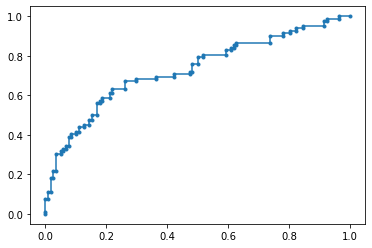

In [19]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test  , y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [20]:
print(ann.predict(sc.transform([[ 0 , 1,  0,  0 , 0  ,0  ,1 , 0 , 0  ,0  ,1, 72, 72, 74]])) > 0.8)

[[False]]


In [21]:
print(ann.predict(sc.transform([[0 , 1,  0,  0 , 0  ,0  ,1 , 0 , 0  ,0  ,1, 72, 72, 74]])))

[[0.00201112]]


# accurancy curve

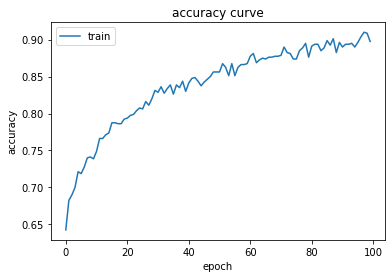

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('accuracy curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'] , loc='upper left')
plt.show()

# loss curve

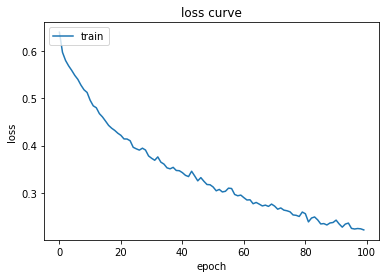

In [23]:
plt.plot(history.history['loss'])
plt.title('loss curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'] , loc='upper left')
plt.show()